## Project Name - Flight Price


In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
df=pd.read_excel(r"C:\Users\user\Documents\flight_price.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Basic Info & Structure

In [3]:
 ## check Shape, Columns, dtypes, Info
print("Check Data:",df.head()),
print("Check Data Info:",df.info()),
print("Check Data Shape:",df.shape)

Check Data:        Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data column

## Summary Statistics

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


## Check Missing Values Analysis

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## ---  Data Cleaning and Feature Engineering ---

## Handling missing values (strategy explained)
 -------------------------
 Strategy (default):
- If column is numeric with missing values => impute mean (column is normaly distributed data)
- If column is numeric with missing values => impute median (column is skewed data)
- If categorical => impute mode (only apply for categorical column )


In [6]:
# Drop the single row with missing values (Route and Total_Stops)
df.dropna(inplace=True)

In [7]:
# Feature Engineering for 'Date_of_Journey'
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y")
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df.drop('Date_of_Journey', axis=1, inplace=True)

In [8]:
# Clean 'Total_Stops' and convert to integer
# Replace 'non-stop' with '0' and then remove ' stop(s)'
df['Total_Stops'] = df['Total_Stops'].replace('non-stop', '0')
df['Total_Stops'] = df['Total_Stops'].str.replace(' stop(s)?', '', regex=True).astype(int)

In [9]:
# Feature Engineering for 'Dep_Time' and 'Arrival_Time'
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.drop('Dep_Time', axis=1, inplace=True)

df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop('Arrival_Time', axis=1, inplace=True)

In [10]:
# Feature Engineering for 'Duration'
def time_to_min(duration):
    """Converts duration string (e.g., '2h 50m') to total minutes."""
    duration = str(duration).strip()
    if 'h' in duration and 'm' in duration:
        parts = duration.split(' ')
        hours = int(parts[0].replace('h', '')) * 60
        minutes = int(parts[1].replace('m', ''))
        return hours + minutes
    elif 'h' in duration:
        return int(duration.replace('h', '')) * 60
    elif 'm' in duration:
        return int(duration.replace('m', ''))
    return 0

df['Duration_minutes'] = df['Duration'].apply(time_to_min)
df.drop('Duration', axis=1, inplace=True)

print("\n--- Cleaned Data Head for Sanity Check ---")
df.head()


--- Cleaned Data Head for Sanity Check ---


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,285


## ---  Univariate Analysis: Price Distribution ---

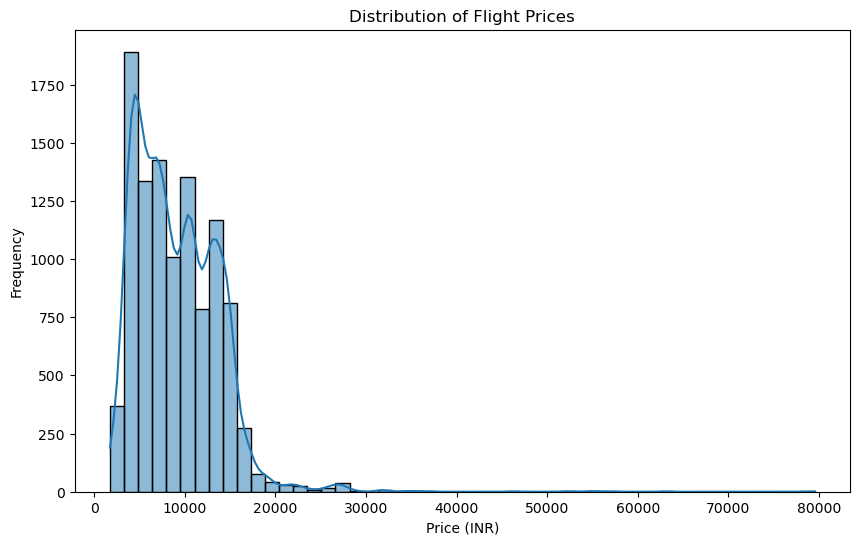

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=50)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

## CONCLUSION:-
#The histogram confirms that the Price distribution is heavily right-skewed.

#A significant price increase occurs in the top 1% of the data, indicating the presence of high-value outliers, likely representing Business Class or premium bookings.

## ---  Bivariate Analysis: Price vs. Categorical Features ---

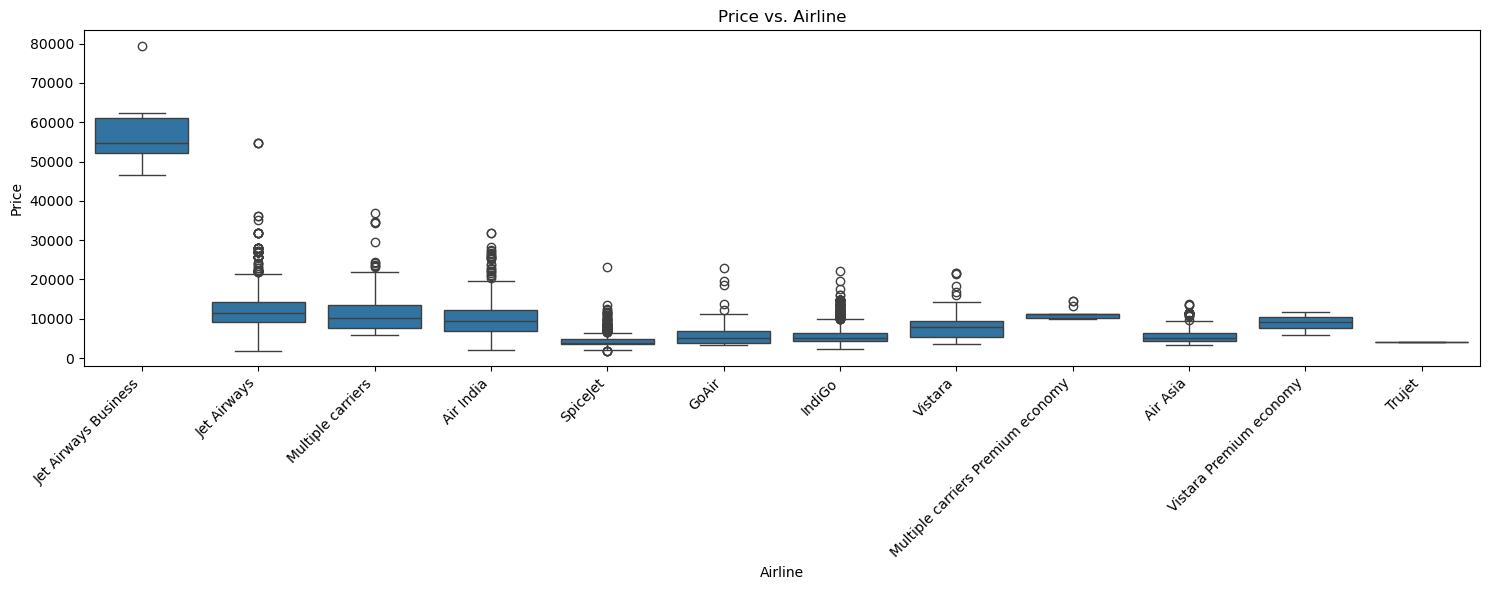

In [12]:
# Price vs. Airline
plt.figure(figsize=(15, 6))
sns.boxplot(y='Price', x='Airline', data=df.sort_values('Price', ascending=False))
plt.title('Price vs. Airline')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## CONCLUSION:- 
#Highest Price/Variance: Jet Airways flights command the highest median prices and show the widest range in prices. The highest outliers belong   exclusively to Jet Airways Business class, which features prices far exceeding all other airlines.

#Lowest Price: Budget carriers like SpiceJet and IndiGo consistently have the lowest median prices.


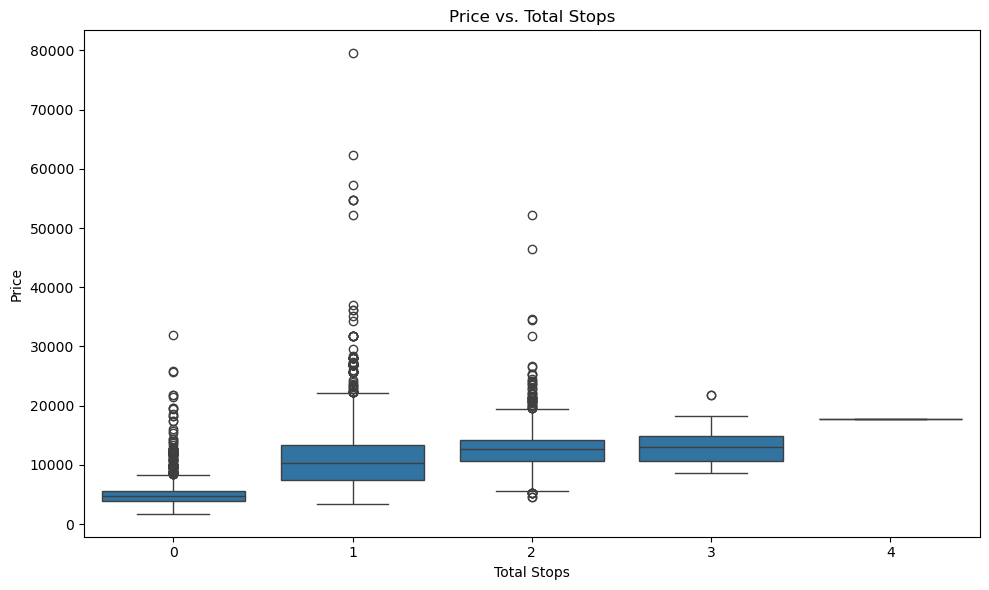

In [13]:
# Price vs. Total_Stops
plt.figure(figsize=(10, 6))
sns.boxplot(y='Price', x='Total_Stops', data=df.sort_values('Price', ascending=False))
plt.title('Price vs. Total Stops')
plt.xlabel('Total Stops')
plt.tight_layout()
plt.show()

## CONCLUSION:- 
#There is a clear positive correlation between the number of stops and price. Flights with 1 stop have a higher median price than non-stop flights.

#Flights with 4 stops generally show the highest median price, suggesting that multi-stop complex routes are often the most expensive.

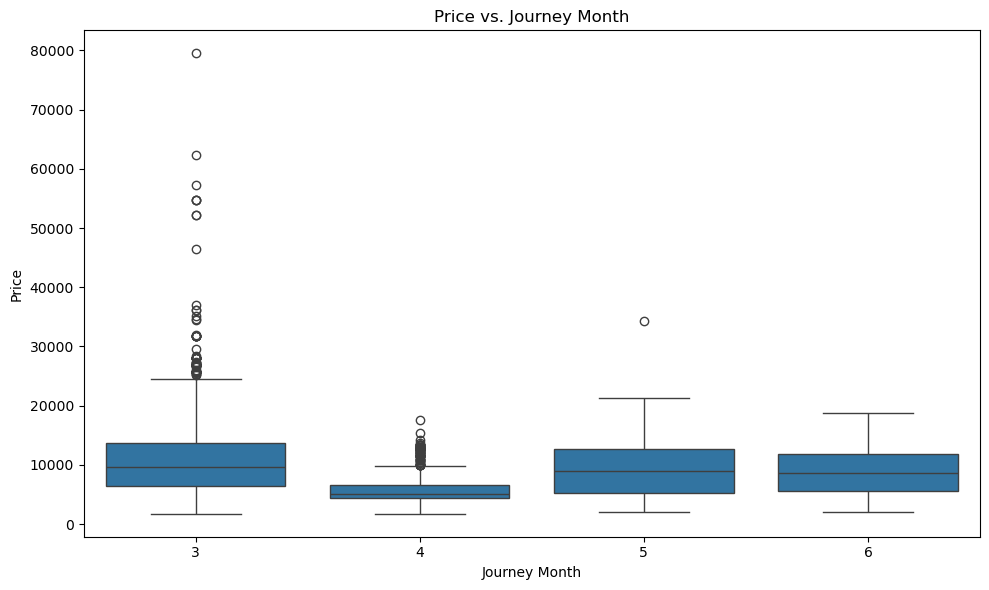

In [14]:
# Price vs. Journey Month
plt.figure(figsize=(10, 6))
sns.boxplot(y='Price', x='Journey_Month', data=df)
plt.title('Price vs. Journey Month')
plt.xlabel('Journey Month')
plt.tight_layout()
plt.show()

## CONCLUSION:- 
#Seasonal Peak (Month): Prices show significant variation by month. Months 3 (March) and 6 (June) exhibit the highest median prices and the largest spread, suggesting these are the peak travel months

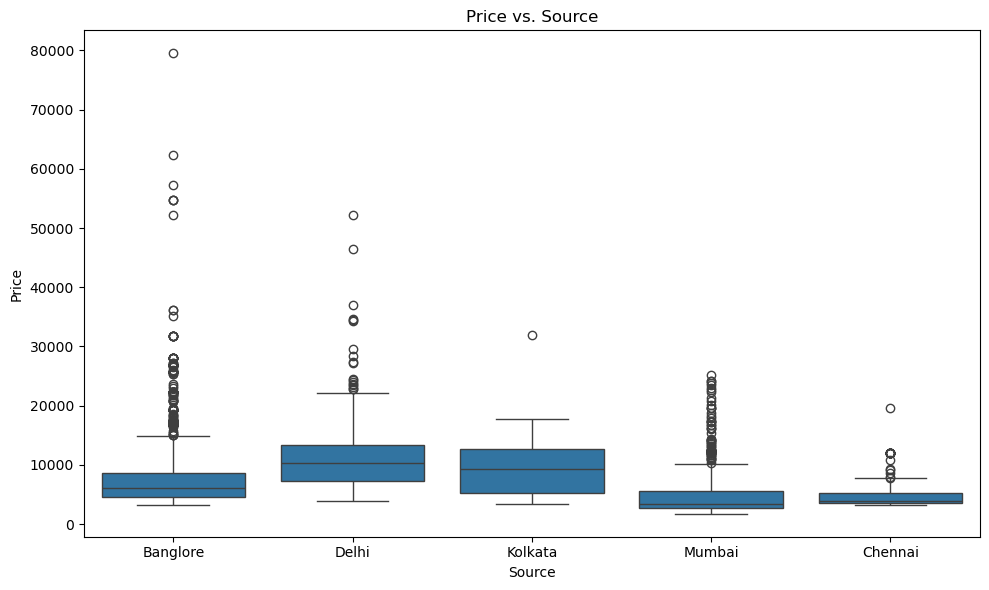

In [15]:
# Price vs. Source
plt.figure(figsize=(10, 6))
sns.boxplot(y='Price', x='Source', data=df.sort_values('Price', ascending=False))
plt.title('Price vs. Source')
plt.tight_layout()
plt.show()

## CONCLUSION:- 
#Flights originating from Delhi and Banglore generally show the highest median prices and the widest range of prices, likely reflecting high-demand routes from major metropolitan hubs.

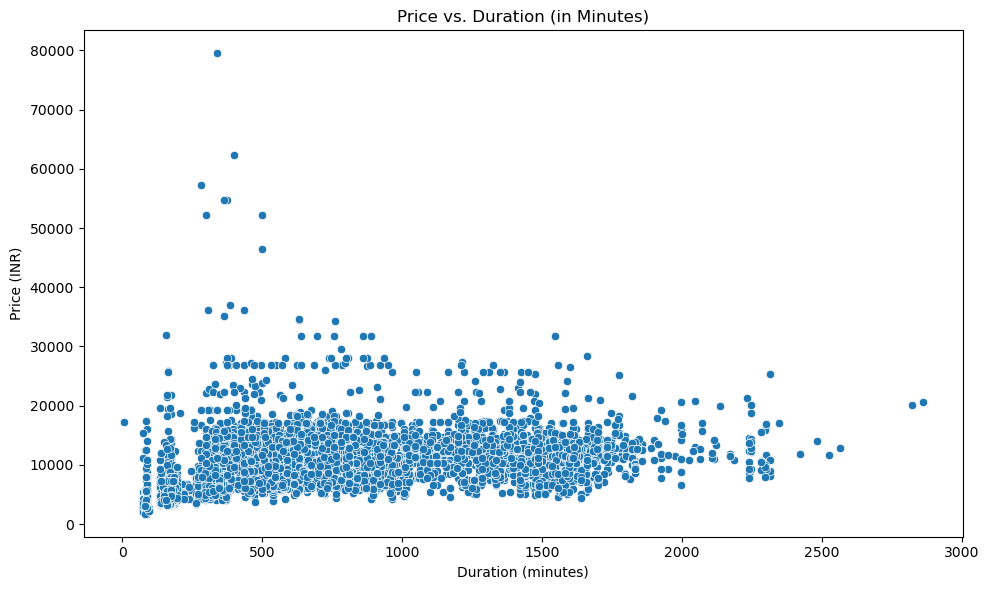

In [16]:
# Price vs. Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_minutes', y='Price', data=df)
plt.title('Price vs. Duration (in Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price (INR)')
plt.tight_layout()
plt.show()

## CONCLUSION:- 
#Duration: The scatter plot shows a strong positive correlation between $\text{Duration\_minutes}$ and $\text{Price}$. Longer flights are generally more expensive, likely because longer routes often involve multiple connections or premium long-haul services.

## ---  Multivariate Analysis: ---

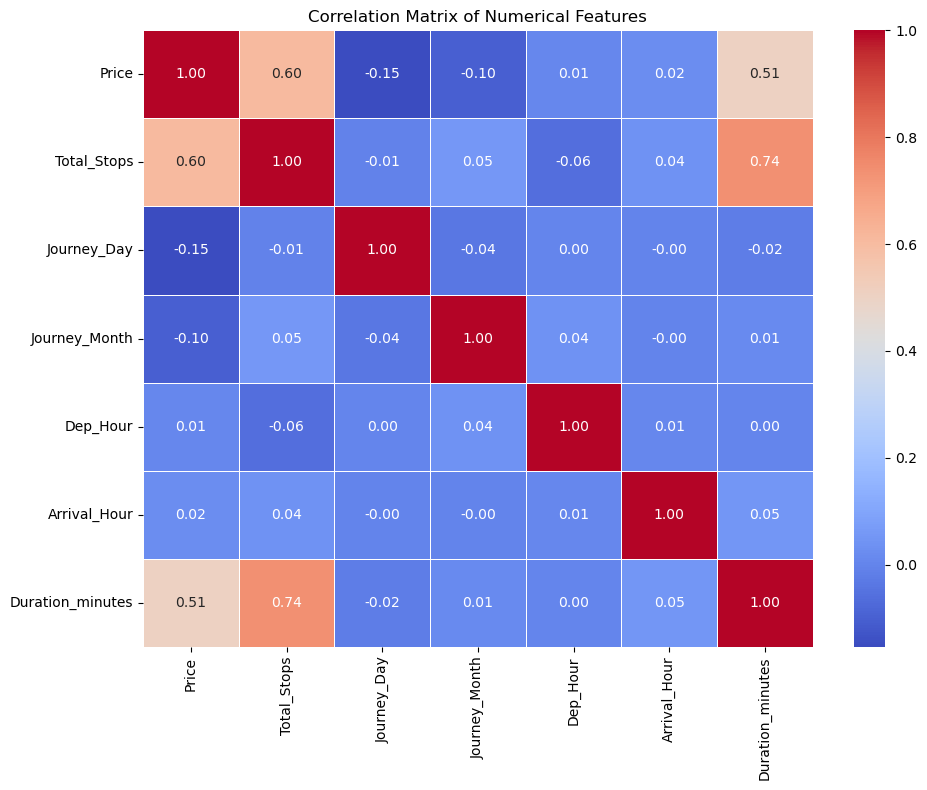

In [17]:
#correlation heatmap
# The numerical/ordinal columns created in the EDA step are:
numerical_cols = ['Price', 'Total_Stops', 'Journey_Day', 'Journey_Month',
                  'Dep_Hour', 'Arrival_Hour', 'Duration_minutes']

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## Interpretation Focus:
1. Price vs. Total_Stops: Expected to be strong positive relationship (more stops, higher price).
2. Price vs. Duration_minutes: Expected to be strong positive relationship (longer flight, higher price).
3. Total_Stops vs. Duration_minutes: Expected to be strong positive relationship (more stops, longer flight).

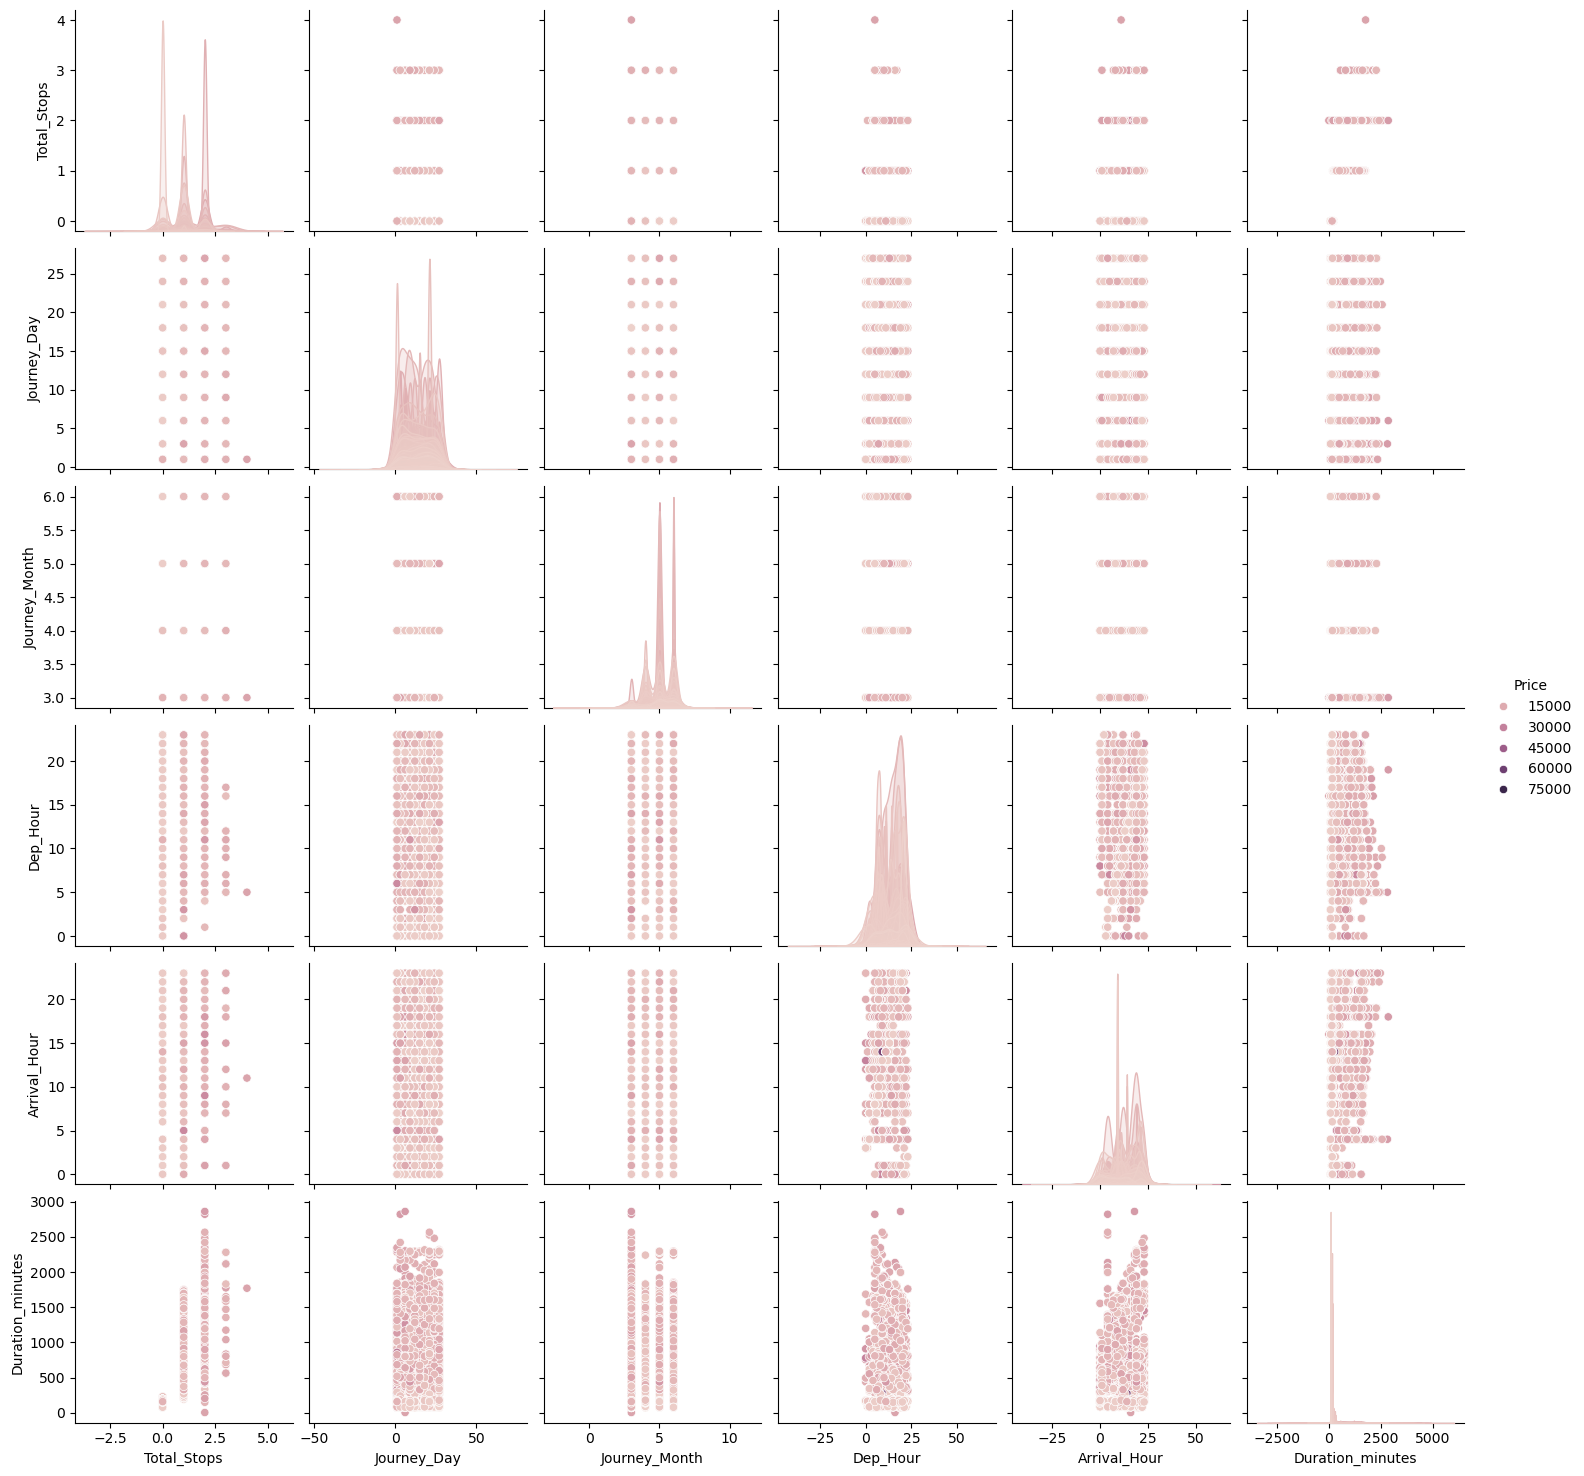

In [18]:
sns.pairplot(df[numerical_cols], hue='Price')
plt.show()

## Save clean data to excel file

In [19]:
df_copy.to_excel('flight_price_CleanData.xlsx')